# Importer les bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats
import pandas as pd
import seaborn as sns
import mne
from mne.stats import spatio_temporal_cluster_test, combine_adjacency
from mne.datasets import sample
from mne.channels import find_ch_adjacency
from mne.viz import plot_compare_evokeds
from mne.time_frequency import tfr_morlet

## Peak to peak amplitude 

In [2]:
df_peak_peak = pd.read_csv('data/data_peak_peak_fcz.csv',delimiter=';')
df_peak_peak

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_peak_peak_fcz.csv'

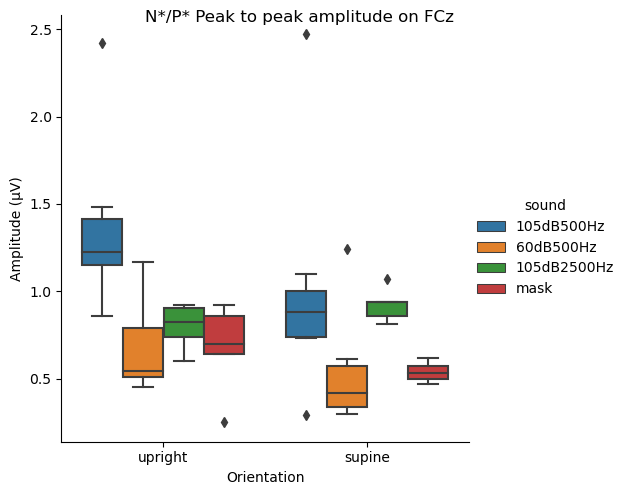

In [37]:
g = sns.catplot(kind='box',x='condition',y='amplitude',hue='sound',data=df_peak_peak)
g.set_axis_labels("Orientation", "Amplitude (µV)")
plt.suptitle('N*/P* Peak to peak amplitude on FCz')
g.savefig('figures/peak_to_peak_amplitude_FCz.png', bbox_inches="tight", transparent=True)

## Permutation cluster test on all sensors (within-subjects)

### Load data 

In [4]:
subs = ['MC','SB','MS','AA','LB','YB','EN','CD','CL','LS','JK','AL','CA','AV','RM','LP','MV','PK']
conds = ['assis','allonge']
sounds = ['bip60db500Hz','bip105db500Hz','bip105db2500Hz','mask']

all_evokeds_assis_bip60db500Hz = []
all_evokeds_assis_bip105db500Hz = []
all_evokeds_assis_bip105db2500Hz = []
all_evokeds_assis_mask = []

all_evokeds_allonge_bip60db500Hz = []
all_evokeds_allonge_bip105db500Hz = []
all_evokeds_allonge_bip105db2500Hz = []
all_evokeds_allonge_mask = []

data_dfs = []

for c in conds:
    print(c)
    if c == 'assis':
        for sub in subs:
            print(sub)
            for s in sounds:
                print(s)
                if s == 'bip60db500Hz':
                    sound_ok = '500Hz60dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_assis_bip60db500Hz.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                elif s == 'bip105db500Hz':
                    sound_ok = '500Hz105dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_assis_bip105db500Hz.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                elif s == 'bip105db2500Hz':
                    sound_ok = '2500Hz105dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_assis_bip105db2500Hz.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                else:
                    sound_ok = 'mask500Hz90dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_assis_mask.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                data_dfs.append(evoked_df)    
            print()
            print()
                    
    else:
        for sub in subs:
            print(sub)
            for s in sounds:
                print(s)
                if s == 'bip60db500Hz':
                    sound_ok = '500Hz60dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    all_evokeds_allonge_bip60db500Hz.append(evoked)
                    
                elif s == 'bip105db500Hz':
                    sound_ok = '500Hz105dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    all_evokeds_allonge_bip105db500Hz.append(evoked)
                    
                elif s == 'bip105db2500Hz':
                    sound_ok = '2500Hz105dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_allonge_bip105db2500Hz.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                else:
                    sound_ok = 'mask500Hz90dB'
                    evoked = mne.read_evokeds('D:/Stage_M2_Paul/' + sub + '/'+ sub + c + '_' + s + '-ave.fif',
                                         condition = sound_ok )
                    all_evokeds_allonge_mask.append(evoked)
                    evoked_df = evoked.to_data_frame()
                    evoked_df['subject'] = sub
                    evoked_df['sound'] = s
                    evoked_df['condition'] = c
                    
                data_dfs.append(evoked_df)
            print()
            print()
                
print(len(all_evokeds_assis_bip60db500Hz))
print(len(all_evokeds_assis_bip105db500Hz))
print(len(all_evokeds_assis_bip105db2500Hz))
print(len(all_evokeds_assis_mask))

print(len(all_evokeds_allonge_bip60db500Hz))
print(len(all_evokeds_allonge_bip105db500Hz))
print(len(all_evokeds_allonge_bip105db2500Hz))
print(len(all_evokeds_allonge_mask))

assis
MC
bip60db500Hz
Reading D:\Stage_M2_Paul\MC\MCassis_bip60db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz60dB)
        0 CTF compensation matrices available
        nave = 594 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db500Hz
Reading D:\Stage_M2_Paul\MC\MCassis_bip105db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz105dB)
        0 CTF compensation matrices available
        nave = 594 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db2500Hz
Reading D:\Stage_M2_Paul\MC\MCassis_bip105db2500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (2500Hz105dB)
        0 CTF compensation matric

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db500Hz
Reading D:\Stage_M2_Paul\YB\YBassis_bip105db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz105dB)
        0 CTF compensation matrices available
        nave = 566 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db2500Hz
Reading D:\Stage_M2_Paul\YB\YBassis_bip105db2500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (2500Hz105dB)
        0 CTF compensation matrices available
        nave = 581 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
mask
Reading D:\Stage_M2_Paul\YB\YBassis_mask-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (m

No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db2500Hz
Reading D:\Stage_M2_Paul\JK\JKassis_bip105db2500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (2500Hz105dB)
        0 CTF compensation matrices available
        nave = 599 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
mask
Reading D:\Stage_M2_Paul\JK\JKassis_mask-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (mask500Hz90dB)
        0 CTF compensation matrices available
        nave = 598 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)


AL
bip60db500Hz
Reading D:\Stage_M2_Paul\AL\ALassis_bip60db500H

        0 CTF compensation matrices available
        nave = 420 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
mask
Reading D:\Stage_M2_Paul\LP\LPassis_mask-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (mask500Hz90dB)
        0 CTF compensation matrices available
        nave = 422 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)


MV
bip60db500Hz
Reading D:\Stage_M2_Paul\MV\MVassis_bip60db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz60dB)
        0 CTF compensation matrices available
        nave = 555 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baselin

    Found the data of interest:
        t =     -49.80 ...     299.80 ms (mask500Hz90dB)
        0 CTF compensation matrices available
        nave = 552 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)


AA
bip60db500Hz
Reading D:\Stage_M2_Paul\AA\AAallonge_bip60db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz60dB)
        0 CTF compensation matrices available
        nave = 572 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db500Hz
Reading D:\Stage_M2_Paul\AA\AAallonge_bip105db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz105dB)
        0 CTF compensation matrices available
        nave = 570 - aspect type = 100
No projector specified f

Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)


CL
bip60db500Hz
Reading D:\Stage_M2_Paul\CL\CLallonge_bip60db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz60dB)
        0 CTF compensation matrices available
        nave = 550 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db500Hz
Reading D:\Stage_M2_Paul\CL\CLallonge_bip105db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz105dB)
        0 CTF compensation matrices available
        nave = 547 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db2500Hz
Reading D:\Stage_M2_Paul\CL\CLallonge_bip105db2500Hz-ave.fif ...
    Found the data of interest:
        t =     -4

        nave = 454 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db500Hz
Reading D:\Stage_M2_Paul\AV\AVallonge_bip105db500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (500Hz105dB)
        0 CTF compensation matrices available
        nave = 458 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
bip105db2500Hz
Reading D:\Stage_M2_Paul\AV\AVallonge_bip105db2500Hz-ave.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms (2500Hz105dB)
        0 CTF compensation matrices available
        nave = 464 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.05, 0] sec)
mask
Re

In [5]:
cond1 = np.array(all_evokeds_assis_bip105db500Hz)
cond2 = np.array(all_evokeds_assis_bip60db500Hz)

In [6]:
all_cond = np.vstack((cond1,cond2))
all_cond

array([[<Evoked | '500Hz105dB' (average, N=594), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=584), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=552), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=490), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=582), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=566), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=554), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=542), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 64 ch, ~273 kB>,
        <Evoked | '500Hz105dB' (average, N=413), -0.049805 – 0.2998 sec, baseline -0.05 

In [7]:
#get data for cond1 (shape: n_sub x n_channels x n_times) 
cond1_first_step = [cond1.get_data() for cond1 in all_cond[0]]
print (np.shape(cond1_first_step))
print(cond1_first_step)
print()

#get data for cond2 (shape: n_sub x n_channels x n_times) 
cond2_first_step = [cond2.get_data() for cond2 in all_cond[1]] 
print (np.shape(cond2_first_step))
print(cond2_first_step)

(18, 64, 359)
[array([[ 8.96644679e-08,  6.86119392e-08,  7.96819037e-08, ...,
        -5.06841104e-07, -4.51962961e-07, -4.58622395e-07],
       [ 5.31743183e-08,  2.08459223e-08,  1.09569520e-07, ...,
        -5.10175084e-07, -3.79624282e-07, -2.66399468e-07],
       [ 1.52976639e-07,  1.37898979e-07,  1.51812245e-07, ...,
        -1.73173319e-07, -9.74893837e-08, -7.20070901e-08],
       ...,
       [-5.94338417e-07, -5.50383845e-07, -5.24598534e-07, ...,
         3.10941459e-08,  4.27276126e-09, -2.11096012e-08],
       [-4.62587423e-07, -4.34828820e-07, -4.16421500e-07, ...,
         9.98774681e-08,  5.90168057e-08,  4.66827110e-08],
       [-4.74149545e-07, -4.51500767e-07, -4.57814480e-07, ...,
         4.68813170e-07,  4.51301929e-07,  4.44292823e-07]]), array([[ 2.05004440e-07,  1.21749864e-07,  8.23609128e-08, ...,
         2.33082574e-07,  2.70554665e-07,  2.99745807e-07],
       [ 9.33867526e-08,  6.77327705e-08,  1.08349127e-07, ...,
         4.21094938e-07,  3.94891572e-0

In [8]:
#stack both conditions (shape: n_cond x n_sub x n_channels x n_times) 
stack_cond1_cond2 = np.stack((cond1_first_step,cond2_first_step))
print(np.shape(stack_cond1_cond2))
stack_cond1_cond2

(2, 18, 64, 359)


array([[[[ 8.96644679e-08,  6.86119392e-08,  7.96819037e-08, ...,
          -5.06841104e-07, -4.51962961e-07, -4.58622395e-07],
         [ 5.31743183e-08,  2.08459223e-08,  1.09569520e-07, ...,
          -5.10175084e-07, -3.79624282e-07, -2.66399468e-07],
         [ 1.52976639e-07,  1.37898979e-07,  1.51812245e-07, ...,
          -1.73173319e-07, -9.74893837e-08, -7.20070901e-08],
         ...,
         [-5.94338417e-07, -5.50383845e-07, -5.24598534e-07, ...,
           3.10941459e-08,  4.27276126e-09, -2.11096012e-08],
         [-4.62587423e-07, -4.34828820e-07, -4.16421500e-07, ...,
           9.98774681e-08,  5.90168057e-08,  4.66827110e-08],
         [-4.74149545e-07, -4.51500767e-07, -4.57814480e-07, ...,
           4.68813170e-07,  4.51301929e-07,  4.44292823e-07]],

        [[ 2.05004440e-07,  1.21749864e-07,  8.23609128e-08, ...,
           2.33082574e-07,  2.70554665e-07,  2.99745807e-07],
         [ 9.33867526e-08,  6.77327705e-08,  1.08349127e-07, ...,
           4.21094938e

In [9]:
#transpose to get adapted shape for permutation cluster test (shape: n_cond x n_sub x n_times x n_channels) 
cond1_cond2_final = [np.transpose(x, (0, 2, 1)) for x in stack_cond1_cond2]
print(np.shape(cond1_cond2_final))
cond1_cond2_final

(2, 18, 359, 64)


[array([[[ 8.96644679e-08,  5.31743183e-08,  1.52976639e-07, ...,
          -5.94338417e-07, -4.62587423e-07, -4.74149545e-07],
         [ 6.86119392e-08,  2.08459223e-08,  1.37898979e-07, ...,
          -5.50383845e-07, -4.34828820e-07, -4.51500767e-07],
         [ 7.96819037e-08,  1.09569520e-07,  1.51812245e-07, ...,
          -5.24598534e-07, -4.16421500e-07, -4.57814480e-07],
         ...,
         [-5.06841104e-07, -5.10175084e-07, -1.73173319e-07, ...,
           3.10941459e-08,  9.98774681e-08,  4.68813170e-07],
         [-4.51962961e-07, -3.79624282e-07, -9.74893837e-08, ...,
           4.27276126e-09,  5.90168057e-08,  4.51301929e-07],
         [-4.58622395e-07, -2.66399468e-07, -7.20070901e-08, ...,
          -2.11096012e-08,  4.66827110e-08,  4.44292823e-07]],
 
        [[ 2.05004440e-07,  9.33867526e-08, -6.53873116e-08, ...,
           4.21958113e-08, -1.24093319e-07,  6.61767032e-08],
         [ 1.21749864e-07,  6.77327705e-08,  7.80074814e-08, ...,
           2.56527297

In [10]:
#Compute difference between paired samples (Upright - Supine) on window [0:100] ms
cond1_minus_cond2 = cond1_cond2_final[0][:,52:156,:] - cond1_cond2_final[1][:,52:156,:]
print(np.shape(cond1_minus_cond2))
cond1_minus_cond2 

(18, 104, 64)


array([[[-1.66314400e-07,  1.11723608e-09,  1.89992804e-08, ...,
          2.46799914e-10, -1.80368289e-08,  1.16710055e-08],
        [-2.41695449e-07,  4.17580424e-08, -2.73011338e-08, ...,
          4.22686099e-08,  5.34878097e-09,  4.89215211e-08],
        [-2.32170418e-07,  1.08634019e-07, -5.56484245e-08, ...,
          5.37103375e-08, -2.75224892e-08,  6.64239792e-08],
        ...,
        [-6.83126096e-07, -3.19173388e-07, -3.99872732e-07, ...,
          7.39921592e-07,  3.31486191e-07,  7.01344163e-07],
        [-5.89667280e-07, -3.76026364e-07, -3.92119730e-07, ...,
          7.77521766e-07,  3.56839436e-07,  7.17956780e-07],
        [-6.27516563e-07, -3.09433020e-07, -4.02538962e-07, ...,
          8.08454978e-07,  3.76854850e-07,  7.23823163e-07]],

       [[ 1.34549055e-07,  1.32917222e-07, -5.78835468e-08, ...,
          1.78723585e-07,  2.84913223e-07,  1.33939778e-07],
        [ 1.90883075e-07,  1.33401272e-07,  2.05527989e-07, ...,
          1.55871717e-07,  2.68078497e

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 64
<class 'scipy.sparse._csr.csr_matrix'>


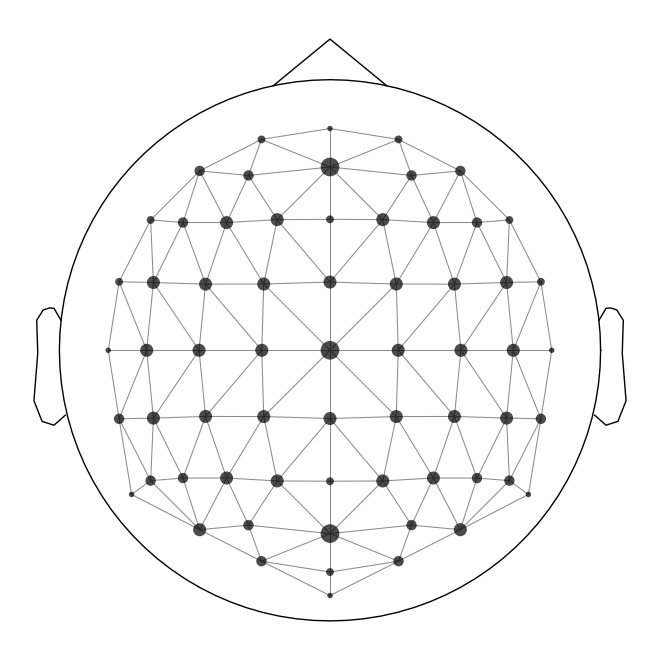

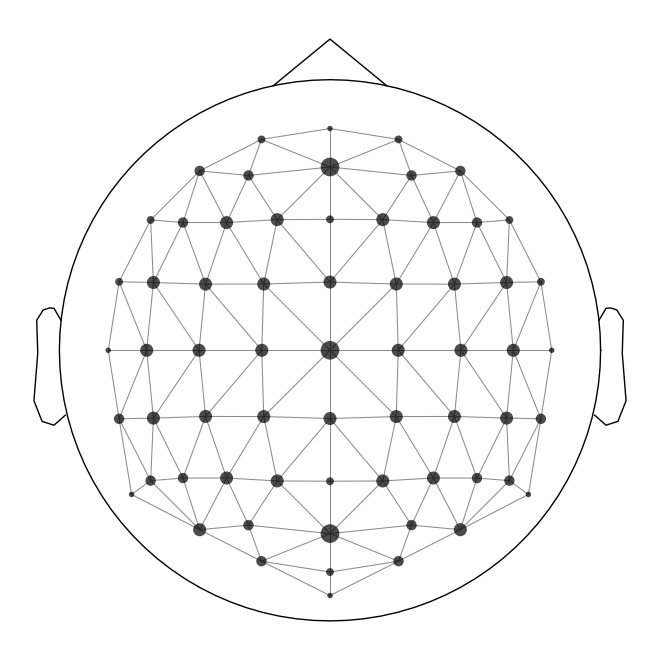

In [11]:
#Find sensor agency
adjacency, ch_names = find_ch_adjacency(cond1[0].info, ch_type='eeg')

print(type(adjacency))  # it's a sparse matrix!

mne.viz.plot_ch_adjacency(cond1[0].info, adjacency, ch_names)

In [12]:
#Compute permutation statistic

# Here we set a cluster forming threshold based on a p-value for
# the cluster based permutation test.
# We use a two-tailed threshold, the "1 - p_threshold" is needed
# because for two-tailed tests we must specify a positive threshold.

tail = 0
p_thresh = 0.05
df = len(cond1) - 1  # degrees of freedom for the test
t_thresh = scipy.stats.distributions.t.ppf(1 - p_thresh / 2, df=df)

# run the cluster based permutation analysis
cluster_stats = mne.stats.spatio_temporal_cluster_1samp_test(cond1_minus_cond2, n_permutations=1000,
                                             threshold=t_thresh, tail=tail,
                                             n_jobs=None, buffer_size=None,
                                             adjacency=adjacency)
T_obs, clusters, p_values, _ = cluster_stats

stat_fun(H1): min=-6.003618 max=6.914726
Running initial clustering …
Found 22 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [13]:
p_values

array([1.   , 0.141, 1.   , 0.863, 1.   , 1.   , 0.963, 1.   , 1.   ,
       1.   , 1.   , 0.001, 0.994, 1.   , 0.995, 0.995, 1.   , 0.077,
       0.994, 1.   , 0.001, 1.   ])


Identifying common channels ...
Identifying common channels ...
combining channels using "gfp"
combining channels using "gfp"


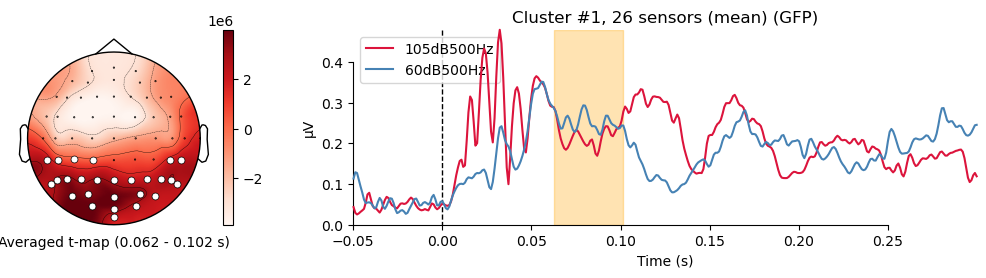

combining channels using "gfp"
combining channels using "gfp"


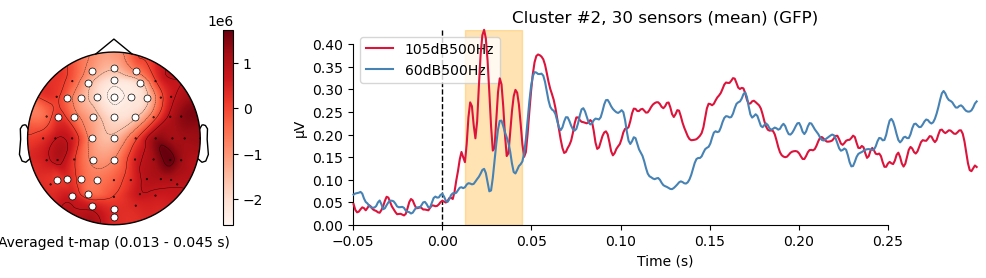

combining channels using "gfp"
combining channels using "gfp"


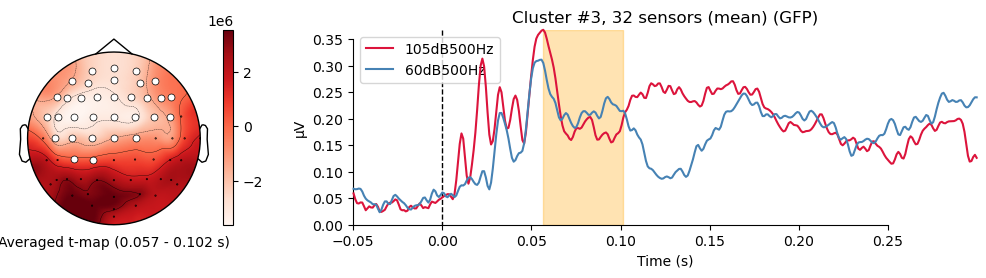

In [14]:
# We subselect clusters that we consider significant at an arbitrarily
# picked alpha level: "p_accept".
# NOTE: remember the caveats with respect to "significant" clusters that
# we mentioned in the introduction of this tutorial!
p_accept = 0.05
good_cluster_inds = np.where(p_values < 0.08)[0]
print()

# configure variables for visualization
colors = {"105dB500Hz": "crimson", "60dB500Hz": 'steelblue'} #assis / allonge
#linestyles = {"L": '-', "R": '--'}

# organize data for plotting
g_evokeds = {'105dB500Hz': mne.grand_average(all_evokeds_assis_bip105db500Hz), 
             '60dB500Hz': mne.grand_average(all_evokeds_assis_bip60db500Hz)}

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # get topography for F stat
    t_map = T_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = cond1[0].times[52:156][time_inds]

    # create spatial mask
    mask = np.zeros((t_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plot average test statistic and mark significant sensors
    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], cond1[0].info, tmin=0)
    t_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vlim=(np.min, np.max), show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged t-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    plot_compare_evokeds(g_evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

### Permutation t-test on all sensors

In [15]:
picks = mne.pick_types(cond1[0].info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

times = cond1[0].times[52:156]

temporal_mask = np.logical_and(0.0 <= times, times <= 0.1)
data = np.mean(cond1_minus_cond2[:,temporal_mask,:], axis=0) #mean on temporal window accross participants
print(data) 
print(np.shape(data))
print()

n_permutations = 10000
T0, p_values, H0 = mne.stats.permutation_t_test(data, n_permutations, tail=0, n_jobs=None)

print(p_values)
print()

significant_sensors = picks[p_values <= 0.05]
significant_sensors_names = [cond1[0].ch_names[k] for k in significant_sensors]

print("Number of significant sensors : %d" % len(significant_sensors))
print("Sensors names : %s" % significant_sensors_names)

[[ 3.23534713e-08  1.67979518e-07  9.87670386e-08 ... -3.63795026e-08
  -1.89684644e-08 -4.29947542e-08]
 [-3.62430491e-09  1.29485402e-07  7.53367792e-08 ... -7.08548385e-09
   5.63238594e-09 -2.25850875e-09]
 [-2.11325922e-08  7.28512358e-08  5.79209168e-08 ...  2.70752654e-08
   3.55543359e-08  5.32897081e-08]
 ...
 [-2.83487127e-07 -1.75199429e-07 -3.97339384e-07 ...  6.96536030e-07
   5.87531690e-07  5.92653469e-07]
 [-2.80403981e-07 -1.62040645e-07 -3.67651189e-07 ...  6.71779812e-07
   5.88766073e-07  5.83347518e-07]
 [-2.78748502e-07 -1.50509901e-07 -3.65696008e-07 ...  6.68458425e-07
   5.97331531e-07  5.90427293e-07]]
(102, 64)

Permuting 9999 times...
[1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 8.100e-03 1.070e-02
 1.000e+00 1.000e-04 1.000e-04 9.967e-01 6.946e-01 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 1.000e+00 1.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


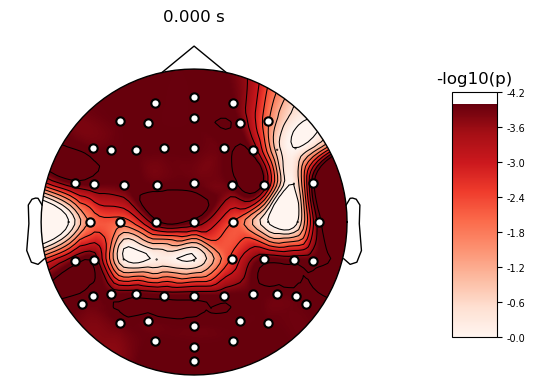

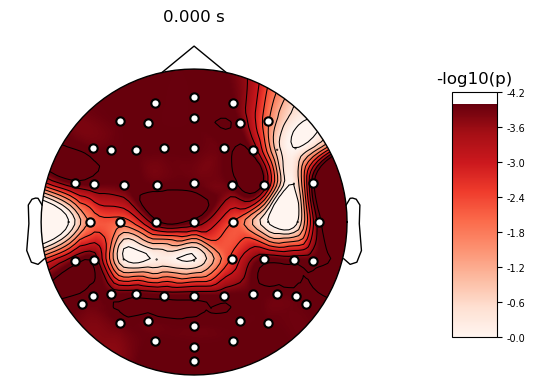

In [16]:
evoked = mne.EvokedArray(-np.log10(p_values)[:, np.newaxis],
                         cond1[0].info, tmin=0.)

# Extract mask and indices of active sensors in the layout
stats_picks = mne.pick_channels(evoked.ch_names, significant_sensors_names)
mask = p_values[:, np.newaxis] <= 0.05

evoked.plot_topomap(ch_type='eeg', times=[0], scalings=1,
                    time_format=None, cmap='Reds', vlim=(0., np.max),
                    units='-log10(p)', cbar_fmt='-%0.1f', mask=mask,
                    size=3, show_names=lambda x: x[4:] + ' ' * 20,
                    time_unit='s')

## Test on specific electrode

### Permutation cluster test

In [17]:
cond1_cz = [x.pick_channels(['Cz']) for x in cond1]
cond1_cz

[<Evoked | '500Hz105dB' (average, N=594), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=584), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=552), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=490), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=582), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=566), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=554), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=542), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=413), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz105dB' (average, N=522), -0.049805 – 0

In [18]:
cond2_cz = [x.pick_channels(['Cz']) for x in cond2]
cond2_cz

[<Evoked | '500Hz60dB' (average, N=594), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=588), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=542), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=501), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=579), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=574), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=559), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=536), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=422), -0.049805 – 0.2998 sec, baseline -0.05 – 0 sec, 1 ch, ~37 kB>,
 <Evoked | '500Hz60dB' (average, N=532), -0.049805 – 0.2998 sec,

In [20]:
all_cond_cz = np.vstack((cond1_cz, cond2_cz))

In [21]:
#Get data from evoked
cond1_cz_first_step_all_sub = [cond1_cz.get_data() for cond1_cz in all_cond_cz[0]]
cond2_cz_first_step_all_sub = [cond2_cz.get_data() for cond2_cz in all_cond_cz[1]]
#print (np.shape(cond1_cz_first_step_all_sub))
#print (np.shape(cond2_cz_first_step_all_sub))
print(cond1_cz_first_step_all_sub)
print()
print()
print(cond2_cz_first_step_all_sub)
print()
print()
print(np.shape(cond1_cz_first_step_all_sub))
#Reshape to have n_sub*n_times array (1 channel: Cz)
# cond1_cz_first_step_all_sub = np.reshape(cond1_cz_first_step_all_sub, (9,120))
# cond2_cz_first_step_all_sub = np.reshape(cond2_cz_first_step_all_sub, (9,120))

#Stack both conditions
stack_cond1_cond2_cz_all_sub = np.stack((cond1_cz_first_step_all_sub,cond2_cz_first_step_all_sub))
print(np.shape(stack_cond1_cond2_cz_all_sub))
print(stack_cond1_cond2_cz_all_sub)
print()
print()

#Compute difference between paired samples (Upright - Supine)
cond1_minus_cond2_cz_all_sub = stack_cond1_cond2_cz_all_sub[0][:,:,52:156] - stack_cond1_cond2_cz_all_sub[1][:,:,52:156]
print(np.shape(cond1_minus_cond2_cz_all_sub))
cond1_minus_cond2_cz_all_sub

[array([[ 5.32051452e-08,  5.60172388e-08,  7.99583617e-08,
         1.07915739e-07,  1.21027838e-07,  1.10439544e-07,
         8.22355659e-08,  5.19700514e-08,  3.24875877e-08,
         2.48906105e-08,  1.98280965e-08,  6.30686614e-09,
        -1.94362002e-08, -5.02448465e-08, -7.15955579e-08,
        -7.22405602e-08, -5.51032677e-08, -3.64106754e-08,
        -3.01828962e-08, -3.33391519e-08, -3.01665395e-08,
        -1.23957689e-08,  1.05184412e-08,  2.37963551e-08,
         2.43467202e-08,  1.96342000e-08,  1.42098786e-08,
         6.67355726e-09,  8.82870166e-11,  5.13873877e-09,
         2.64102464e-08,  5.12418801e-08,  6.11321838e-08,
         5.27725241e-08,  3.97227780e-08,  3.29529932e-08,
         2.82713746e-08,  1.66621579e-08, -3.49221402e-10,
        -1.32484992e-08, -1.93674783e-08, -2.69005902e-08,
        -4.25518714e-08, -6.19875209e-08, -7.56029053e-08,
        -7.92685526e-08, -7.58238912e-08, -7.00839067e-08,
        -6.68316886e-08, -6.99583680e-08, -7.61069359e-

array([[[-5.16950882e-08,  2.48739518e-08,  8.48622967e-08, ...,
         -2.38790594e-07, -2.47141919e-07, -2.44761063e-07]],

       [[-7.30760625e-08, -1.02971374e-07, -1.29979377e-07, ...,
         -4.25560245e-08,  2.79737691e-08,  1.06922897e-07]],

       [[ 9.58835642e-08,  5.68937395e-08,  3.86127397e-08, ...,
          3.93147879e-07,  3.51678707e-07,  3.43865715e-07]],

       ...,

       [[-3.04840832e-07, -1.44830921e-07,  3.21610685e-08, ...,
         -1.19349301e-06, -1.12148422e-06, -9.95431350e-07]],

       [[-5.49895404e-07, -4.74629417e-07, -4.24036131e-07, ...,
         -7.71686241e-07, -6.25990637e-07, -4.95396620e-07]],

       [[-8.58003943e-08, -1.04656110e-07, -1.08414646e-07, ...,
         -2.00890449e-07, -1.87848062e-07, -1.99160244e-07]]])

In [22]:
# In this example, we wish to set the threshold for including data bins in
# the cluster forming process to the t-value corresponding to p=0.05 for the
# given data.
#
# Because we conduct a two-tailed test, we divide the p-value by 2 (which means
# we're making use of both tails of the distribution).
# As the degrees of freedom, we specify the number of observations
# (here: subjects) minus 1.
# Finally, we subtract 0.05 / 2 from 1, to get the critical t-value
# on the right tail (this is needed for MNE-Python internals)

tail = 0
degrees_of_freedom = len(cond1_cz) - 1
t_thresh = scipy.stats.t.ppf(1 - 0.05 / 2, df=degrees_of_freedom)


T_obs, clusters, cluster_p_values, H0 = \
    mne.stats.permutation_cluster_1samp_test(cond1_minus_cond2_cz_all_sub, n_permutations=1000,
                             threshold=t_thresh, tail=tail, n_jobs=None,
                             out_type='mask')


stat_fun(H1): min=-3.604080 max=1.660764
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [23]:
cluster_p_values

array([0.416, 0.215, 0.117, 0.399, 0.028])

In [25]:
clusters

[array([[ True,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False]]),
 array([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
          True,  

In [26]:
times = cond1_cz[0].times[52:156]
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
ax.set_title('Channel : ' + 'Cz')
ax.plot(times, np.mean(cond1_cz_first_step_all_sub, axis=0)[0][52:156], 
        times, np.mean(cond2_cz_first_step_all_sub, axis=0)[0][52:156])
#ax.plot(times, np.mean(cond1_minus_cond2_cz_all_sub, axis=0))

ax.set_ylabel("EEG (µV)")
ax.legend(["ERP - Upright 105dB 500Hz", "ERP - Upright 60dB 500Hz"])
ax.invert_yaxis()
ax.axvline(0, ymin=0, ymax=1, color="0.1", dashes=(2, 1), zorder=0)

for i_c, c in enumerate(clusters):
    print(i_c)
    print(c)
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = ax2.axvspan(times[c.start], times[c.stop - 1],
                        color='r', alpha=0.3)
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                    alpha=0.3)

hf = plt.plot(times, T_obs, 'g')
#ax2.legend((h, ), ('cluster p-value < 0.05', ))
ax2.axvline(0, ymin=0, ymax=1, color="0.1", dashes=(2, 1), zorder=0)
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("t-values")
plt.show()

0
[[ True  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]]


AttributeError: 'numpy.ndarray' object has no attribute 'start'

## Test on one subject 

### On channel FCz 

In [33]:
en_epochs = mne.read_epochs("data/EN/ENallonge_epochs-epo.fif")
en_epochs

Reading C:\Users\CNRS\Desktop\Analyses_Lou_eeg\data\EN\ENallonge_epochs-epo.fif ...
    Found the data of interest:
        t =     -49.80 ...     299.80 ms
        0 CTF compensation matrices available
Not setting metadata
2316 matching events found
No baseline correction applied
0 projection items activated


Number of events,2316
Events,2500Hz105dB: 583500Hz105dB: 579500Hz60dB: 574mask500Hz90dB: 580
Time range,-0.050 – 0.300 sec
Baseline,-0.050 – 0.000 sec


In [54]:
np.shape(en_epochs['500Hz105dB'].get_data())

(579, 64, 359)

In [34]:
event_id = ['500Hz105dB', '500Hz60dB']
en_epochs.equalize_event_counts(event_id)

data_105 = en_epochs['500Hz105dB'].get_data()  # as 3D matrix
data_60 = en_epochs['500Hz60dB'].get_data()  # as 3D matrix

condition1 = data_105[:, 47, 52:156]  # take only one channel to get a 2D array on window [0:100]ms
condition2 = data_60[:, 47, 52:156]  # take only one channel to get a 2D array on window [0:100]ms

Dropped 5 epochs: 386, 389, 770, 1159, 1545


In [35]:
tail = 0 

degrees_of_freedom = len(data_105) - 1
t_thresh = scipy.stats.t.ppf(1 - 0.05 / 2, df=degrees_of_freedom)

T_obs, clusters, cluster_p_values, H0 = \
    mne.stats.permutation_cluster_test([condition1, condition2], n_permutations=1000,
                             threshold=t_thresh, tail=tail, n_jobs=None,
                             out_type='mask')

stat_fun(H1): min=0.006707 max=10.345352
Running initial clustering …
Found 5 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [36]:
cluster_p_values

array([0.692, 0.479, 0.214, 0.235, 0.146])

In [37]:
clusters

[(slice(7, 8, None),),
 (slice(15, 20, None),),
 (slice(37, 47, None),),
 (slice(59, 77, None),),
 (slice(78, 103, None),)]

(slice(7, 8, None),)
(slice(15, 20, None),)
(slice(37, 47, None),)
(slice(59, 77, None),)
(slice(78, 103, None),)


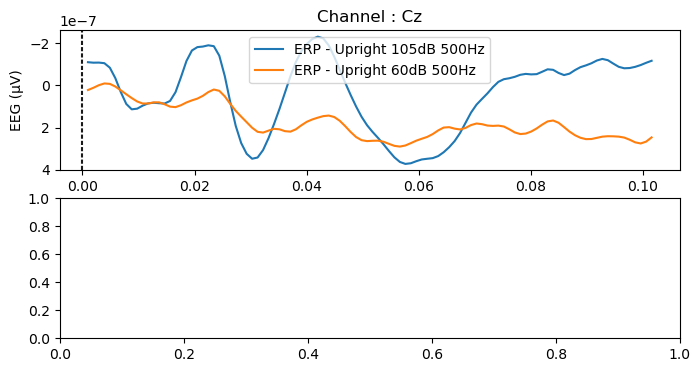

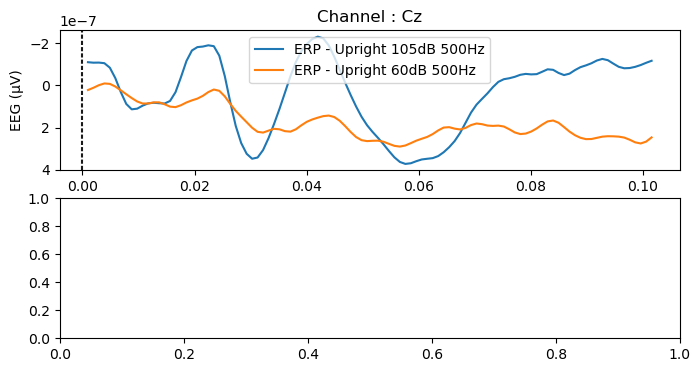

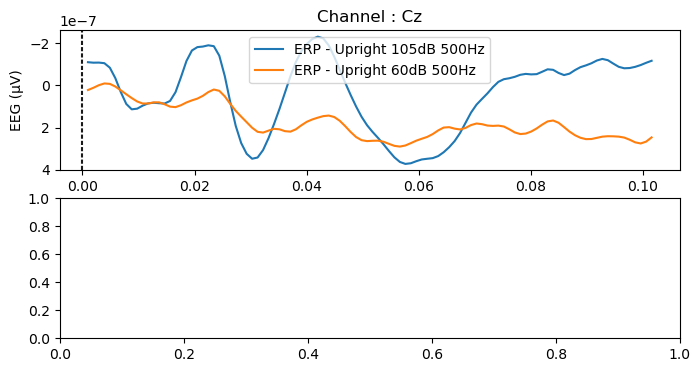

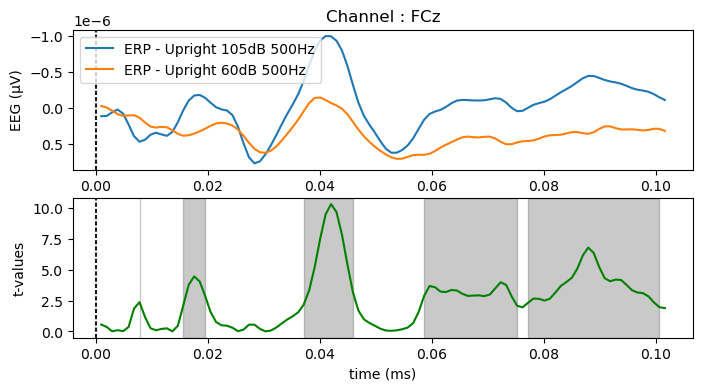

In [38]:
times = en_epochs.times[52:156]
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
ax.set_title('Channel : ' + 'FCz')
ax.plot(times, np.mean(condition1, axis=0), 
        times, np.mean(condition2, axis=0))
#ax.plot(times, np.mean(assis_minus_allonge_cz_all_sub, axis=0))

ax.set_ylabel("EEG (µV)")
ax.legend(["ERP - Upright 105dB 500Hz", "ERP - Upright 60dB 500Hz"])
ax.invert_yaxis()
ax.axvline(0, ymin=0, ymax=1, color="0.1", dashes=(2, 1), zorder=0)

for i_c, c in enumerate(clusters):
    print(c)
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = ax2.axvspan(times[c.start], times[c.stop - 1],
                        color='r', alpha=0.3)
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3),
                    alpha=0.3)

hf = plt.plot(times, T_obs, 'g')
#ax2.legend((h, ), ('cluster p-value < 0.05', ))
ax2.axvline(0, ymin=0, ymax=1, color="0.1", dashes=(2, 1), zorder=0)
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("t-values")
plt.show()

### On all sensors

In [51]:
event_id = ['500Hz105dB', '500Hz60dB']#, '2500Hz105dB', 'mask500Hz90dB']
en_epochs.equalize_event_counts(event_id)

# Obtain the data as a 3D matrix and transpose it such that
# the dimensions are as expected for the cluster permutation test:
# n_epochs × n_times × n_channels
temporal_mask = np.logical_and(0.0 <= en_epochs.times, en_epochs.times <= 0.1)
X = [en_epochs[event_name].get_data() for event_name in event_id]
X = [np.transpose(x, (0, 2, 1)) for x in X]
X = [x[:,temporal_mask,:] for x in X]

Dropped 0 epochs: 


In [52]:
np.shape(X)

(2, 574, 103, 64)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 64
<class 'scipy.sparse._csr.csr_matrix'>


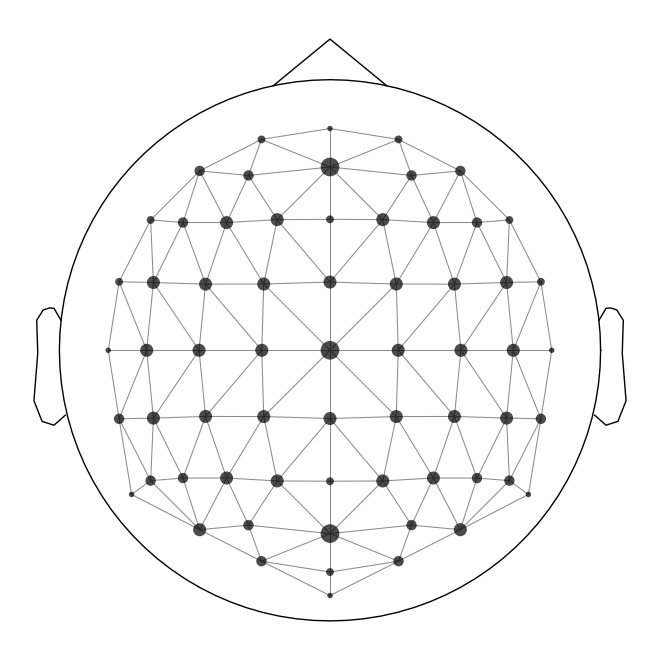

In [53]:
adjacency, ch_names = find_ch_adjacency(en_epochs.info, ch_type='eeg')

print(type(adjacency))  # it's a sparse matrix!

mne.viz.plot_ch_adjacency(en_epochs.info, adjacency, ch_names)

In [54]:
# We are running an F test, so we look at the upper tail
# see also: https://stats.stackexchange.com/a/73993
tail = 0

# We want to set a critical test statistic (here: F), to determine when
# clusters are being formed. Using Scipy's percent point function of the F
# distribution, we can conveniently select a threshold that corresponds to
# some alpha level that we arbitrarily pick.
alpha_cluster_forming = 0.05

# For an F test we need the degrees of freedom for the numerator
# (number of conditions - 1) and the denominator (number of observations
# - number of conditions):
n_conditions = len(event_id)
n_observations = len(X[0])
dfn = n_conditions - 1
dfd = n_observations - n_conditions

# Note: we calculate 1 - alpha_cluster_forming to get the critical value
# on the right tail
f_thresh = scipy.stats.f.ppf(1 - alpha_cluster_forming, dfn=dfn, dfd=dfd)

# run the cluster based permutation analysis
cluster_stats = spatio_temporal_cluster_test(X, n_permutations=1000,
                                             threshold=f_thresh, tail=tail,
                                             n_jobs=None, buffer_size=None,
                                             adjacency=adjacency)
F_obs, clusters, p_values, _ = cluster_stats

stat_fun(H1): min=0.000000 max=41.179358
Running initial clustering …
Found 18 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [55]:
p_values

array([0.999, 1.   , 0.979, 0.343, 0.835, 0.999, 0.31 , 0.986, 0.102,
       0.661, 0.919, 0.45 , 0.825, 0.98 , 0.996, 0.001, 1.   , 0.999])

[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102]
combining channels using "gfp"
combining channels using "gfp"


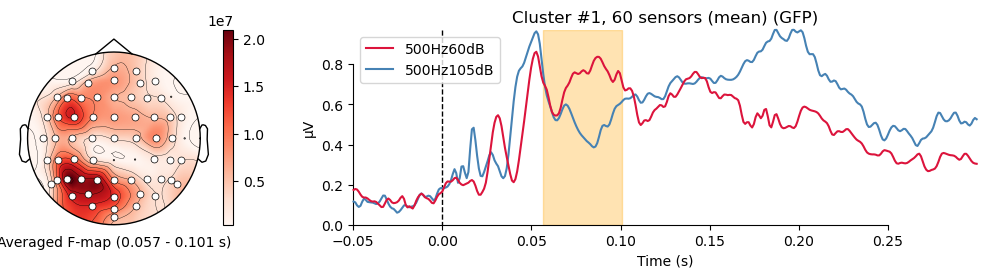

In [58]:
# We subselect clusters that we consider significant at an arbitrarily
# picked alpha level: "p_accept".
# NOTE: remember the caveats with respect to "significant" clusters that
# we mentioned in the introduction of this tutorial!
p_accept = 0.05
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = {"500Hz60dB": "crimson", "500Hz105dB": 'steelblue'}#,
         #"2500Hz105dB": "darkorange", "500Hz105dB": 'darkgreen',} #assis / allonge

# organize data for plotting
evokeds = {cond: en_epochs[cond].average() for cond in event_id}

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    print(time_inds)

    # get topography for F stat
    f_map = F_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = en_epochs.times[52:156][time_inds] #+ 0.05

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plot average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], en_epochs.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vlim=(np.min, np.max), show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged F-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

### On all sensors but specific period of time 

In [61]:
picks = mne.pick_types(en_epochs.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

times = en_epochs.times

temporal_mask = np.logical_and(0.0 >= times, times <= 0.1)
en_epochs.equalize_event_counts(event_id)
data_105 = en_epochs['500Hz105dB'].get_data()  # as 3D matrix
data_60 = en_epochs['500Hz60dB'].get_data()  # as 3D matrix
data_paired = data_105 - data_60
data = np.mean(data_paired[:,:,temporal_mask], axis=2) #mean on temporal window accross trials
print(data) 
print(np.shape(data))
print()

n_permutations = 10000
T0, p_values, H0 = mne.stats.permutation_t_test(data, n_permutations, tail=0, n_jobs=None)

print(p_values)
print()

significant_sensors = picks[p_values <= 0.05]
significant_sensors_names = [en_epochs.ch_names[k] for k in significant_sensors]

print("Number of significant sensors : %d" % len(significant_sensors))
print("Sensors names : %s" % significant_sensors_names)

Dropped 0 epochs: 
[[-1.01115697e-14  1.28444264e-14  2.70552811e-14 ... -2.97881378e-14
  -2.73285668e-15  2.81484238e-14]
 [ 1.35468559e-14 -1.27504844e-14  3.74401365e-14 ...  5.99520433e-15
  -2.71577632e-15  9.87244474e-15]
 [-2.42882637e-14 -1.65337829e-14 -1.12730338e-14 ... -1.06581410e-14
   1.09314267e-14 -1.29810692e-15]
 ...
 [ 3.88065648e-14  2.63037455e-15  1.72169971e-14 ...  3.89432076e-14
   5.05578485e-15 -7.10542736e-15]
 [-5.57502762e-14  5.00112772e-14  3.26576373e-14 ...  1.71486756e-14
  -1.53723188e-15  4.91807449e-15]
 [ 1.44841404e-14 -3.43656727e-14  2.26827104e-14 ... -1.91299967e-14
   1.84467826e-15  3.82599935e-15]]
(574, 64)

Permuting 9999 times...
[1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     0.9999 1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     0.9999 1.
 1.     1.     1.     1.     0.997  1.     1.     1.     1.     1.
 1.     1.     1.     0.9977 1.     1.    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


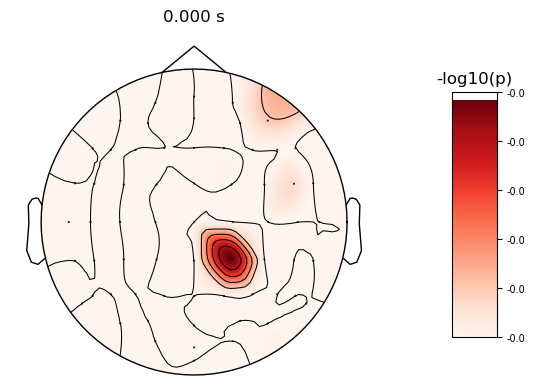

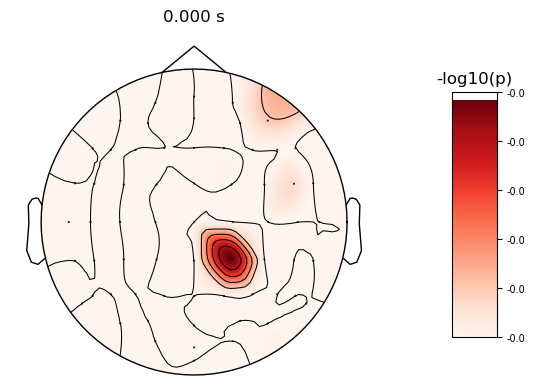

In [65]:
evoked = mne.EvokedArray(-np.log10(p_values)[:, np.newaxis],
                         en_epochs.info, tmin=0.)

# Extract mask and indices of active sensors in the layout
stats_picks = mne.pick_channels(evoked.ch_names, significant_sensors_names)
mask = p_values[:, np.newaxis] < 0.05

evoked.plot_topomap(ch_type='eeg', times=[0], scalings=1,
                    time_format=None, cmap='Reds', vlim=(0., np.max),
                    units='-log10(p)', cbar_fmt='-%0.1f', mask=mask,
                    size=3, show_names=lambda x: x[4:] + ' ' * 20,
                    time_unit='s')